# Deep Neural Network with Keras (Tensorflow Backend)
## Dataset: A-Z Handwritten Alphabets

The link for the dataset is [here](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format)

Data Shape: (372450, 785)
Data Max and Min: 255 0


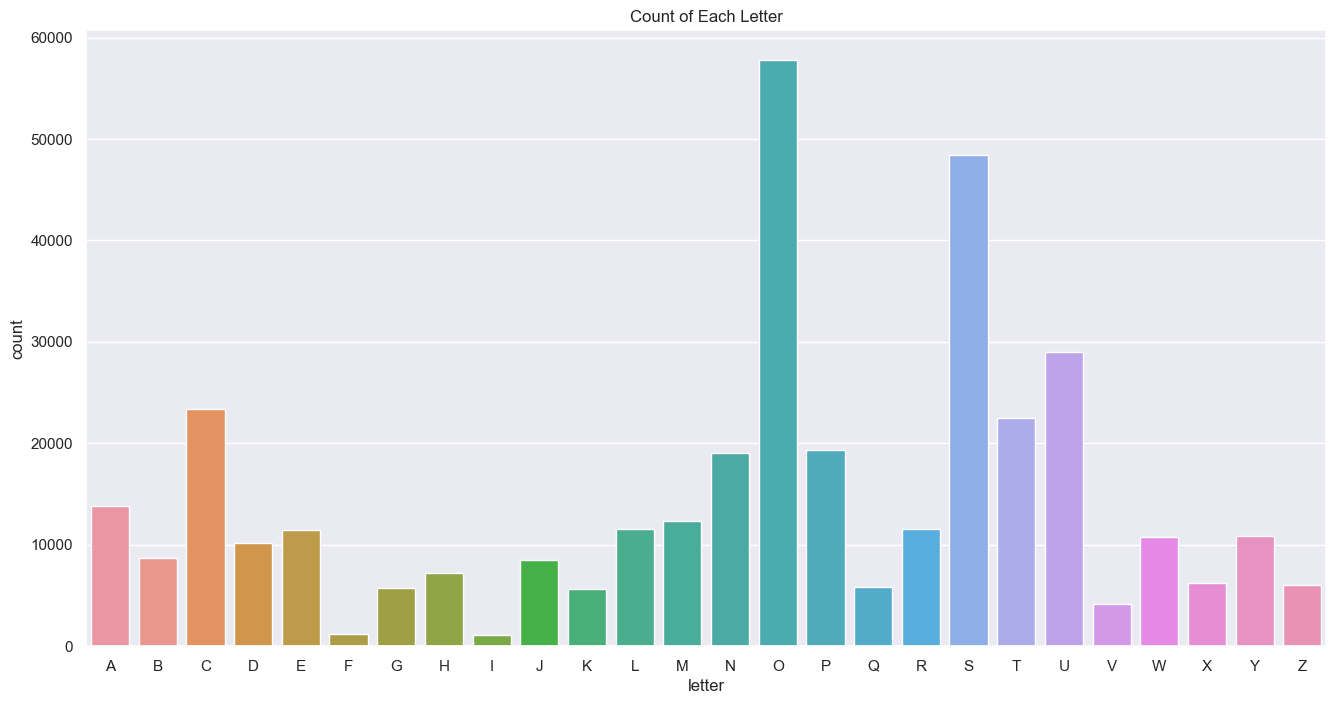

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read in data
df = pd.read_csv('A_Z Handwritten Data.csv')

# Check data shape
print("Data Shape:", df.shape)

# Check data max and min
print("Data Max and Min:", df.max().max(), df.min().min())

# Visualize data distribution
sns.set()
letters = df['0'].value_counts().reset_index()
letters.columns = ['letter', 'count']
letters['letter'] = letters['letter'].apply(lambda x: chr(x + 65))
letters = letters.sort_values(by='letter')
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='count', data=letters)
plt.title('Count of Each Letter')
plt.show()


In [2]:
# Load and preprocess the dataset
def load_data(df, percent_train=0.8):
    # Randomize and split the data into training and testing
    shuffled_df = df.sample(frac=1)
    X = shuffled_df.iloc[:, 1:].values / 255  # Normalize pixel values
    y = pd.get_dummies(shuffled_df.iloc[:, 0]).values  # One-hot encode labels
    split_idx = int(len(X) * percent_train)
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_test, y_test = X[split_idx:], y[split_idx:]
    return X_train, y_train, X_test, y_test

# Splitting data into training and testing sets
X_train, y_train, X_test, y_test = load_data(df)

In [3]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
9312/9312 [==============================] - 45s 5ms/step - loss: 0.3453 - accuracy: 0.9047 - val_loss: 0.2130 - val_accuracy: 0.9402
Epoch 2/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.1735 - accuracy: 0.9510 - val_loss: 0.1721 - val_accuracy: 0.9517
Epoch 3/10
9312/9312 [==============================] - 47s 5ms/step - loss: 0.1447 - accuracy: 0.9591 - val_loss: 0.1430 - val_accuracy: 0.9607
Epoch 4/10
9312/9312 [==============================] - 50s 5ms/step - loss: 0.1272 - accuracy: 0.9640 - val_loss: 0.1421 - val_accuracy: 0.9606
Epoch 5/10
9312/9312 [==============================] - 59s 6ms/step - loss: 0.1164 - accuracy: 0.9665 - val_loss: 0.1305 - val_accuracy: 0.9641
Epoch 6/10
9312/9312 [==============================] - 60s 6ms/step - loss: 0.1076 - accuracy: 0.9692 - val_loss: 0.1317 - val_accuracy: 0.9636
Epoch 7/10
9312/9312 [==============================] - 58s 6ms/step - loss: 0.1002 - accuracy: 0.9711 - val_loss: 0.1260 - val_ac

2328/2328 [==============================] - 9s 4ms/step - loss: 0.1292 - accuracy: 0.9639


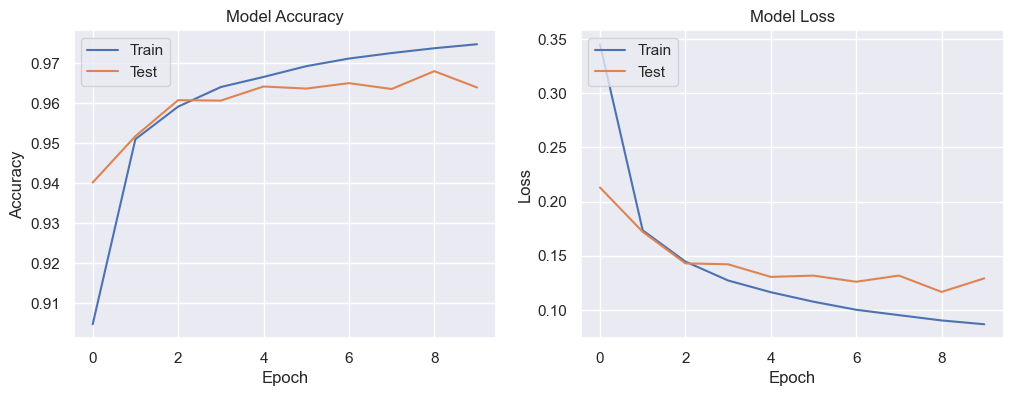

In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [6]:
# Predict and evaluate
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predicted_labels == actual_labels)
print("Test Set Accuracy:", accuracy)


2328/2328 [==============================] - 8s 3ms/step
Test Set Accuracy: 0.9639011947912471


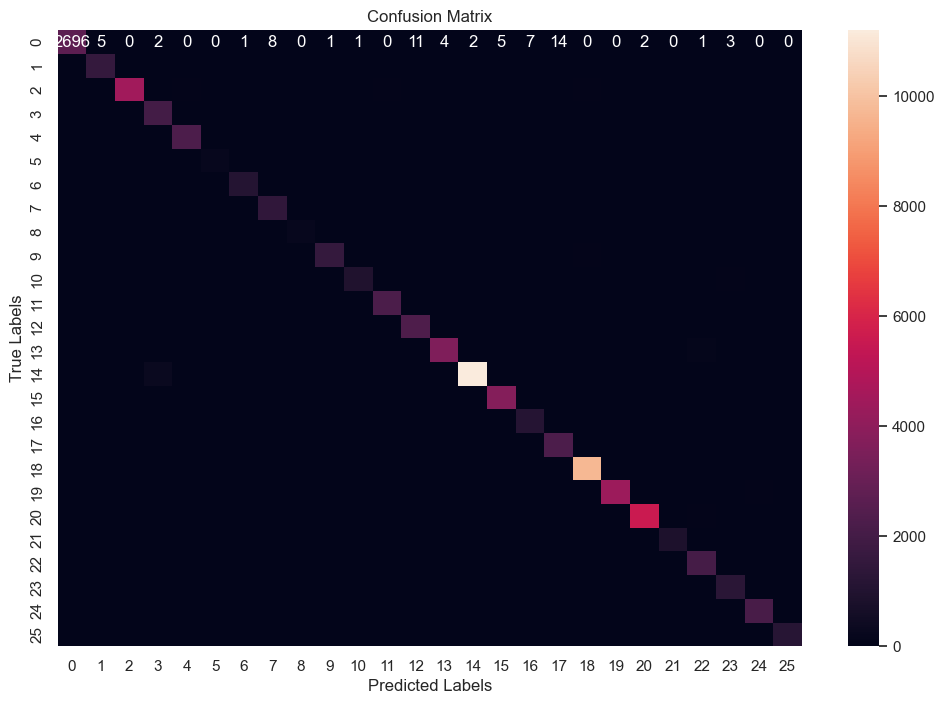

In [9]:
# Plot confusion matrix
plt.figure(figsize=(12, 8))
# True labels vs predicted labels
cm = tf.math.confusion_matrix(labels=actual_labels, predictions=predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




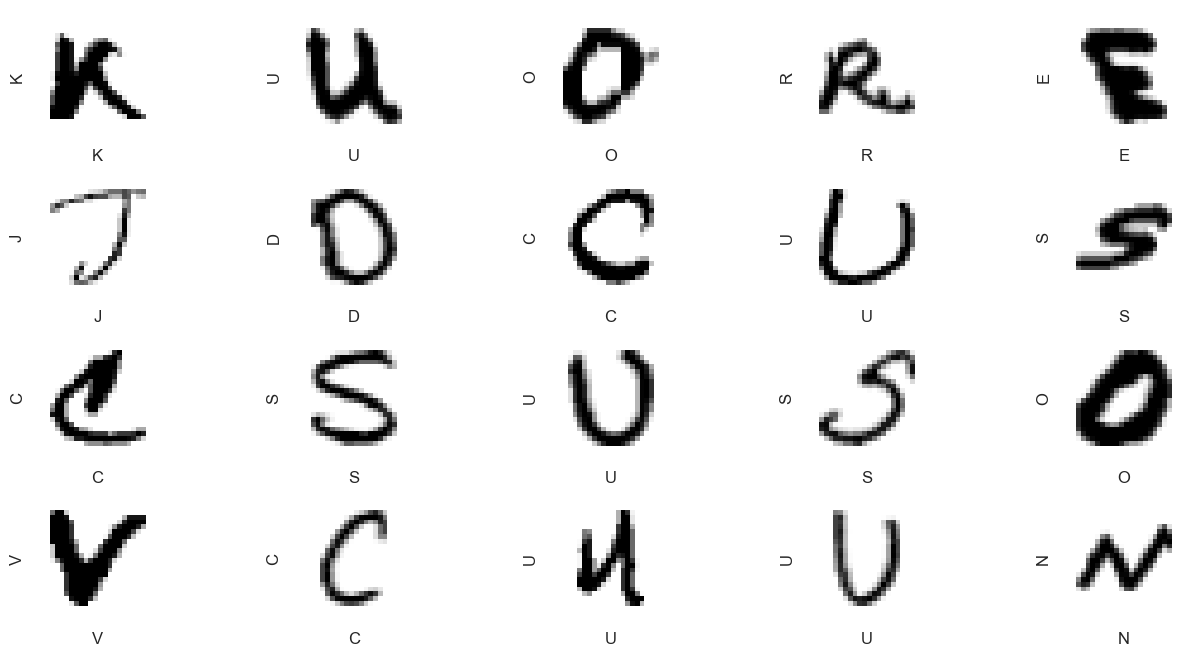

In [10]:
# Show some predictions
plt.figure(figsize=(16, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(chr(actual_labels[i] + 65))
    plt.ylabel(chr(predicted_labels[i] + 65))
plt.show()